In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew, norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print(train_df.shape)
print(test_df.shape)

(550068, 12)
(233599, 11)


In [3]:
submission = pd.read_csv('sample_submission_V9Inaty.csv')

submission['User_ID'] = test_df['User_ID']
submission['Product_ID'] = test_df['Product_ID']

In [4]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
train_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


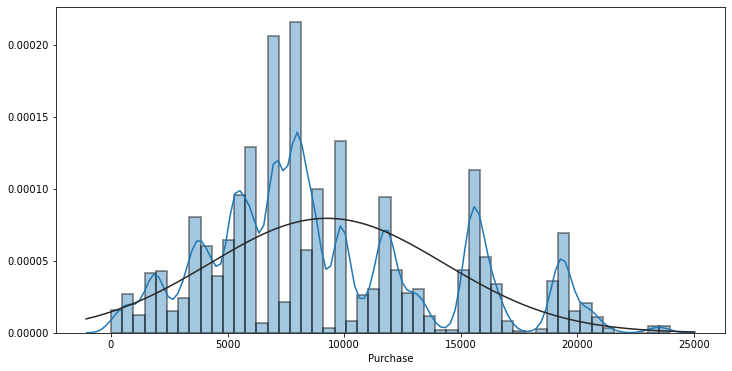

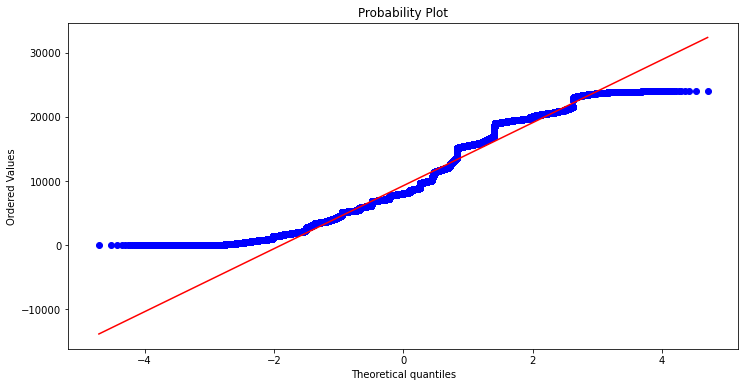

In [8]:
plt.figure(figsize = (12,6))
sns.distplot(train_df['Purchase'], fit=norm, hist_kws=dict(edgecolor="black", linewidth=2));
plt.figure(figsize = (12,6))
res = stats.probplot(train_df['Purchase'], plot = plt)

In [9]:
data = train_df.drop(['User_ID', 'Product_ID'], axis = 1)

In [10]:
#sns.pairplot(data)

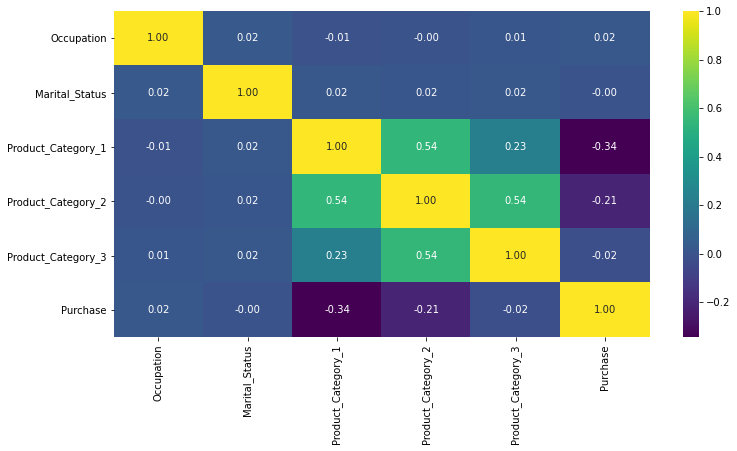

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot = True, cmap = 'viridis', fmt = '.2f')

In [12]:
pr = train_df.corr()['Purchase'].sort_values(ascending = False)
pr = pd.DataFrame(pr)
pr

,Purchase
Purchase,1.000000
Occupation,0.020833
User_ID,0.004716
Marital_Status,-0.000463
Product_Category_3,-0.022006
Product_Category_2,-0.209918
Product_Category_1,-0.343703


In [13]:
train_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [14]:
test_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [15]:
train_df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [16]:
train_df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [17]:
train_df['Product_Category_2'] = train_df['Product_Category_2'].fillna(0)
train_df['Product_Category_3'] = train_df['Product_Category_3'].fillna(0)

In [18]:
test_df['Product_Category_2'] = test_df['Product_Category_2'].fillna(0)
test_df['Product_Category_3'] = test_df['Product_Category_3'].fillna(0)

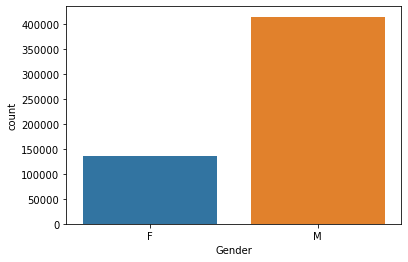

In [19]:
sns.countplot(train_df['Gender'])

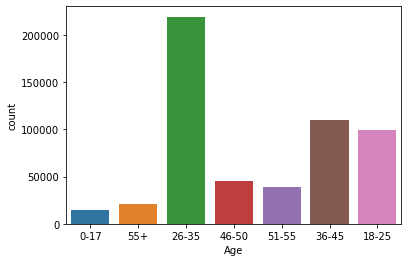

In [20]:
sns.countplot(train_df['Age'])

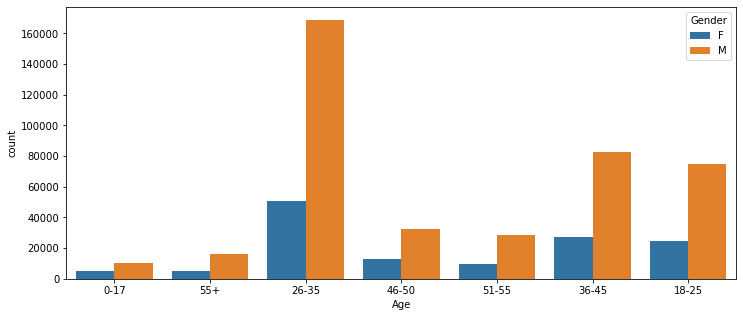

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(train_df['Age'], hue = train_df['Gender'])

In [22]:
gender = train_df[['Gender', 'Purchase']].groupby('Gender').mean()
gender = pd.DataFrame(gender)
gender

,Purchase
Gender,
F,8734.565765
M,9437.526040


In [23]:
age = train_df[['Age', 'Purchase']].groupby('Age').mean()
age = pd.DataFrame(age)
age.sort_values(by = 'Purchase', ascending=False)

,Purchase
Age,
51-55,9534.808031
55+,9336.280459
36-45,9331.350695
26-35,9252.690633
46-50,9208.625697
18-25,9169.663606
0-17,8933.464640


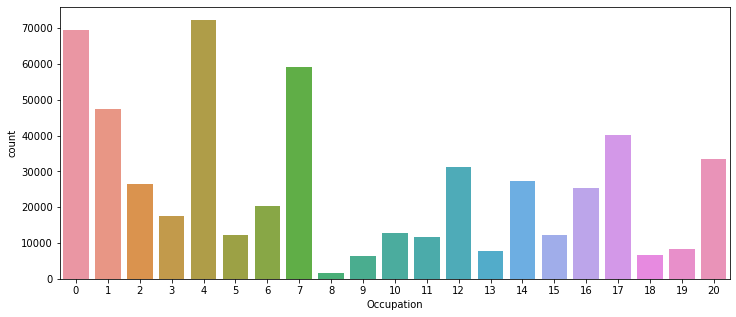

In [24]:
plt.figure(figsize=(12,5))
sns.countplot(train_df['Occupation'])

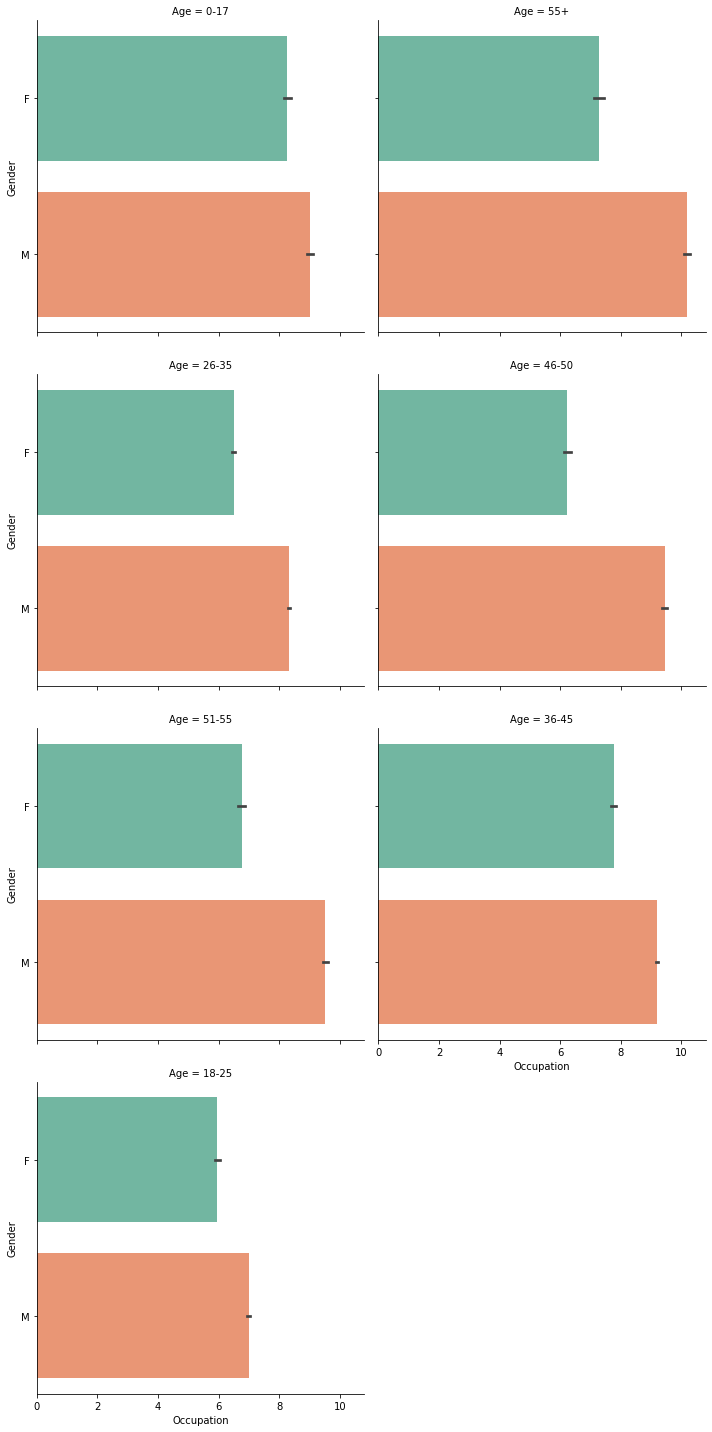

In [25]:
sns.catplot('Occupation','Gender',col='Age',data=train_df,kind='bar',col_wrap=2,palette='Set2')

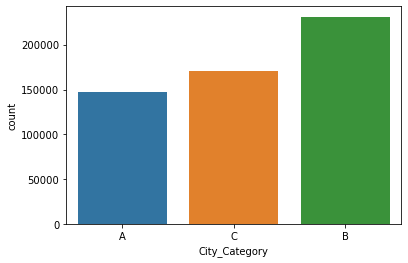

In [26]:
sns.countplot(train_df['City_Category'])

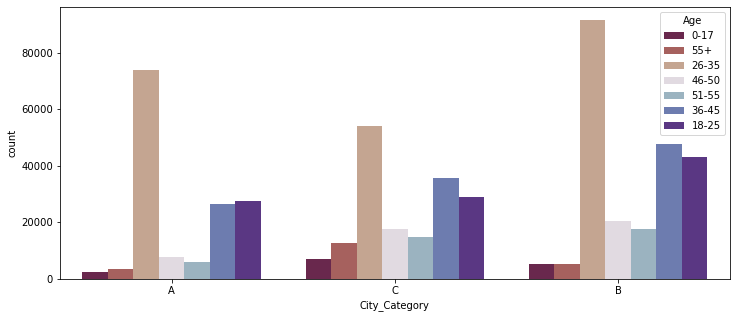

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(train_df['City_Category'], hue = train_df['Age'], palette='twilight_shifted_r')

In [28]:
City_Category = train_df[['City_Category', 'Purchase']].groupby('City_Category').mean()
City_Category = pd.DataFrame(City_Category)
City_Category.sort_values(by = 'Purchase', ascending=False)

,Purchase
City_Category,
C,9719.920993
B,9151.300563
A,8911.939216


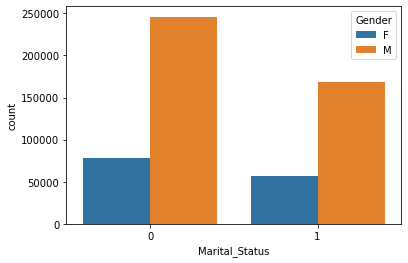

In [29]:
sns.countplot(train_df['Marital_Status'], hue = train_df['Gender'])

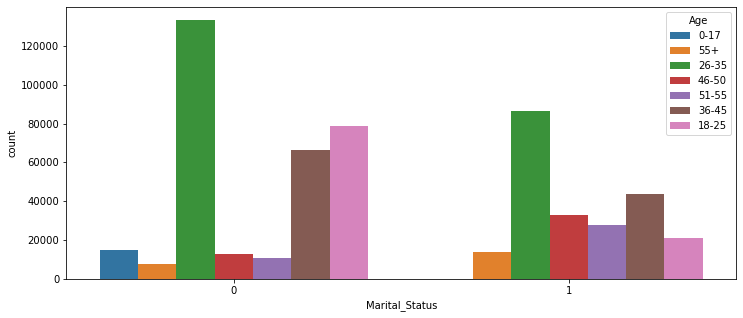

In [30]:
plt.figure(figsize=(12,5))
sns.countplot(train_df['Marital_Status'], hue = train_df['Age'])

In [31]:
Marital_Status = train_df[['Marital_Status', 'Purchase']].groupby('Marital_Status').mean()
Marital_Status = pd.DataFrame(Marital_Status)
Marital_Status.sort_values(by = 'Purchase', ascending=False)

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


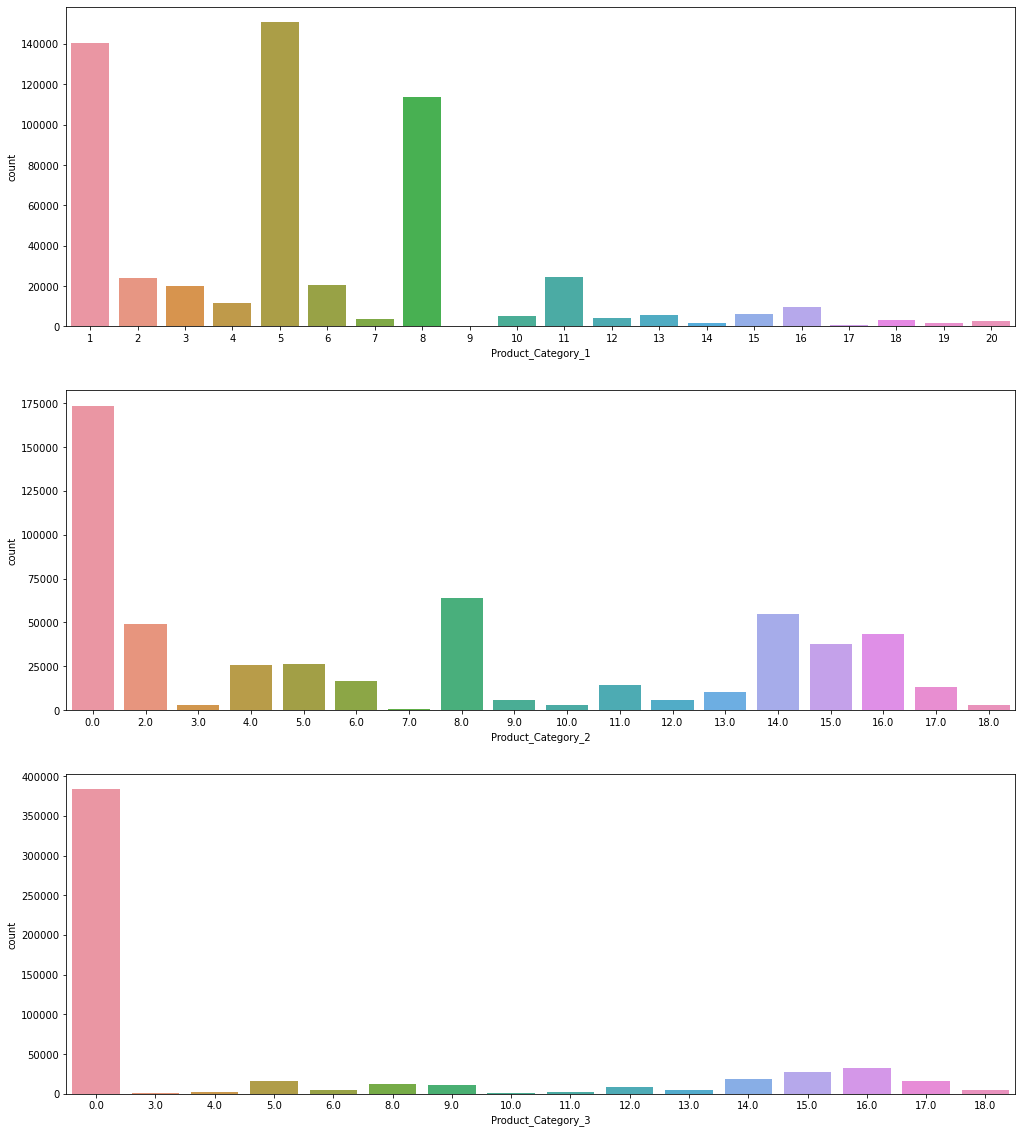

In [32]:
fig, ax = plt.subplots(3, 1, figsize = (17,20))
_=sns.countplot(train_df['Product_Category_1'], ax=ax[0])
_=sns.countplot(train_df['Product_Category_2'], ax=ax[1])
_=sns.countplot(train_df['Product_Category_3'], ax=ax[2])

In [33]:
train_df = train_df.drop(['User_ID', 'Product_ID'], axis = 1)
test_df = test_df.drop(['User_ID', 'Product_ID'], axis = 1)

In [34]:
train_df['Stay_In_Current_City_Years'] = train_df['Stay_In_Current_City_Years'].replace('4+', 4)
test_df['Stay_In_Current_City_Years'] = test_df['Stay_In_Current_City_Years'].replace('4+', 4)

In [35]:
encode = LabelEncoder()

train_df['Gender'] = encode.fit_transform(train_df['Gender'])
train_df['Age'] = encode.fit_transform(train_df['Age'])
train_df['City_Category'] = encode.fit_transform(train_df['City_Category'])

In [36]:
test_df['Gender'] = encode.fit_transform(test_df['Gender'])
test_df['Age'] = encode.fit_transform(test_df['Age'])
test_df['City_Category'] = encode.fit_transform(test_df['City_Category'])

In [37]:
X = train_df.drop('Purchase', axis = 1)
y = train_df['Purchase']
X_test = test_df

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
prediction = lin_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, prediction)))

4627.777465694635


In [42]:
ridge = Ridge()
ridge.fit(X_train, y_train)
prediction = ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, prediction)))

4627.777448221024


In [43]:
lasso = Lasso()
lasso.fit(X_train, y_train)
prediction = lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, prediction)))

4627.776571259747


In [44]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
prediction = elastic_net.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, prediction)))

4655.426801460534


In [45]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
prediction = gbr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, prediction)))

2996.3495615263732


In [46]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
xgbr_prediction = xgbr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, prediction)))

2996.3495615263732


In [47]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
prediction = lgbm.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, prediction)))

2918.8537476815045


In [48]:
model = Sequential()

model.add(Dense(256, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(1))

In [49]:
model.compile(optimizer='adam',loss='mse')

In [50]:
tf.keras.backend.set_floatx('float64')

In [51]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=64,epochs=15)

Epoch 1/15

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

6017/6017 [==============================] - 83s 14ms/step - loss: 19306708.0000 - val_loss: 16737145.0000
Epoch 2/15
6017/6017 [==============================] - 82s 14ms/step - loss: 14924655.0000 - val_loss: 14122544.0000
Epoch 3/15
6017/6017 [==============================] - 77s 13ms/step - loss: 12616396.0000 - val_loss: 11231377.0000
Epoch 4/15
6017/6017 [==============================] - 76s 13ms/step - loss: 10555475.0000 - val_loss: 10003300.0000
Epoch 5/15
6017/6017 [==============

In [52]:
loss = pd.DataFrame(model.history.history)

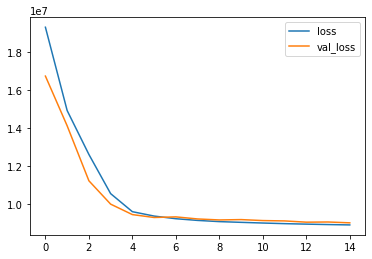

In [53]:
loss.plot()

In [54]:
ann_pred = model.predict(X_test)